In [1]:
import phoebe
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib
import lightkurve as lk
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import statistics
from astropy.timeseries import LombScargle
from sklearn.preprocessing import MinMaxScaler
import Pyriod



PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


In [2]:
%matplotlib widget
#%matplotlib inline
#from Pyriod import Pyriod
import qgrid
import lmfit
import ipywidgets

In [3]:
logger = phoebe.logger()

binary = phoebe.default_binary()

binary.add_dataset('lc', times=np.linspace(0, 330, 31000), dataset='mylc')
#changed from 1260, 1566, 12000 

<ParameterSet: 80 parameters | contexts: constraint, figure, compute, dataset>

In [4]:
binary.set_value('teff@primary@component', 13000)
#print(binary)

In [5]:
binary.set_value('teff@secondary@component',8330)

In [6]:
binary.set_value('period@binary@component', 2.306)

In [7]:
binary.set_value('requiv@primary@component',0.117)
binary.set_value('requiv@secondary@component', 1.25)

In [8]:
binary.set_value('ld_mode_bol@primary@component', 'manual')
binary.set_value('ld_mode_bol@secondary@component', 'lookup')
binary.set_value('atm@primary@phoebe01@compute', 'blackbody')
binary.set_value('gravb_bol@primary@component', 0.9)
binary.set_value('gravb_bol@secondary@component', 0.9)
binary.set_value('irrad_frac_refl_bol@primary@component', 1.0)
binary.set_value('irrad_frac_refl_bol@secondary@component', 1.0)
binary.set_value('incl@binary@orbit@component', 80.1)
binary.set_value('ld_mode@primary@mylc', 'manual')
binary.set_value('q@binary@component', 13)

In [9]:
binary.set_value('t0_supconj@binary@component', 1.52)
binary.set_value('t0@system', 2.41)
print(binary)

PHOEBE Bundle: 189 parameters
                        t0@system: 2.41 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary)
         requiv@primary@component: 0.117 solRad
C    requiv_max@primary@component: 1.0073965347188878 solRad
           teff@primary@component: 13000.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.730363508146246
        syncpar@primary@component: 1.0
C        period@primary@component: 2.306 d
C          freq@primary@component: 2.7247116218560277 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 80.1 deg
C       long_an@primary@component: 0.0 d

In [10]:

print(binary.run_compute(irrad_method='none'))

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 31000/31000 [06:09<00:00, 83.85it/s]


ParameterSet: 3 parameters
R              times@latest@model: [0.00000000e+00 1.06455047e-02 2.12910094e-02 ...
 3.29978709e+02 3.29989354e+02 3.30000000e+02] d
R             fluxes@latest@model: [40.47586982 40.47263082 40.47076291 ... 40.40675222
 40.40467649 40.40250386] W / m2
            comments@latest@model: 


In [11]:
#afig = binary['mylc@model'].plot(show=True, size=0.01)


In [12]:
print(binary)

PHOEBE Bundle: 194 parameters
                        t0@system: 2.41 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary)
         requiv@primary@component: 0.117 solRad
C    requiv_max@primary@component: 1.0073965347188878 solRad
           teff@primary@component: 13000.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 4.730363508146246
        syncpar@primary@component: 1.0
C        period@primary@component: 2.306 d
C          freq@primary@component: 2.7247116218560277 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 80.1 deg
C       long_an@primary@component: 0.0 d

In [13]:
print(binary.get_parameter('gravb_bol@secondary@component'))

Parameter: gravb_bol@secondary@component
                       Qualifier: gravb_bol
                     Description: Bolometric gravity brightening
                           Value: 0.9
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [3]:
search = lk.search_lightcurve('KIC 10727668')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 14,2012,Kepler,1800,kplr010727668,0.0
1,Kepler Quarter 15,2013,Kepler,1800,kplr010727668,0.0
2,Kepler Quarter 16,2013,Kepler,1800,kplr010727668,0.0
3,Kepler Quarter 17,2013,Kepler,1800,kplr010727668,0.0


In [4]:
lc_collection = search.download_all()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

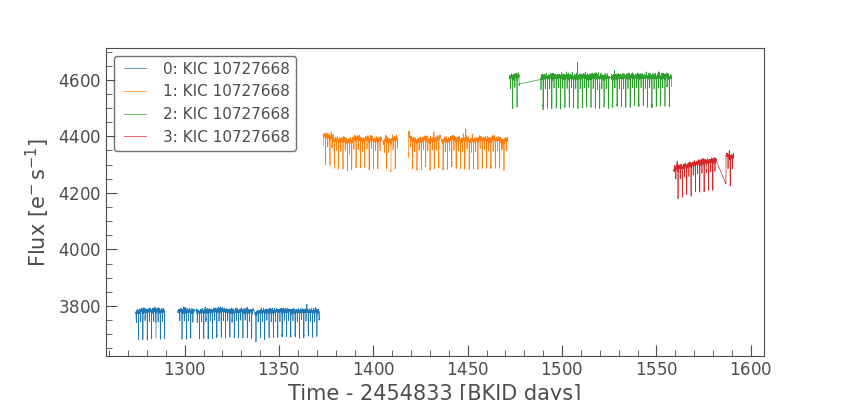

In [5]:
lc_collection.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

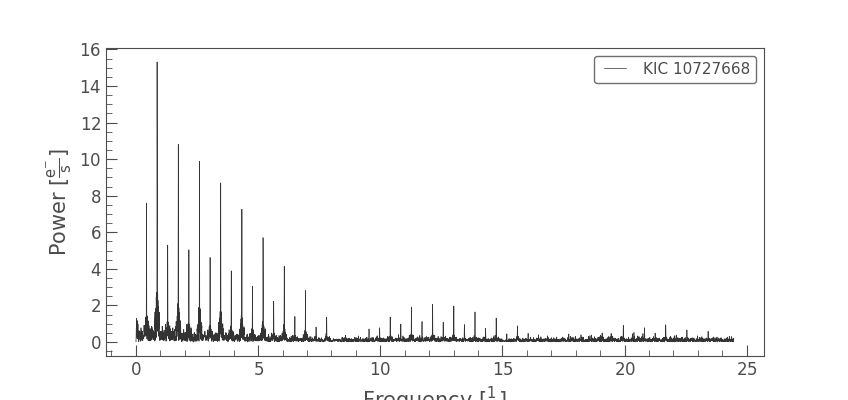

In [8]:
lc = lc_collection[0]
#lc_collection_stitched = lc_collection.stitch()
#lc_collection_stitched = lc_collection_stitched.remove_outliers()
lc.to_periodogram().plot()

In [7]:
lc_collection_stitched_clean = lc_collection_stitched.remove_nans()
lc_collection_stitched_clean= lc_collection_stitched_clean.flatten()

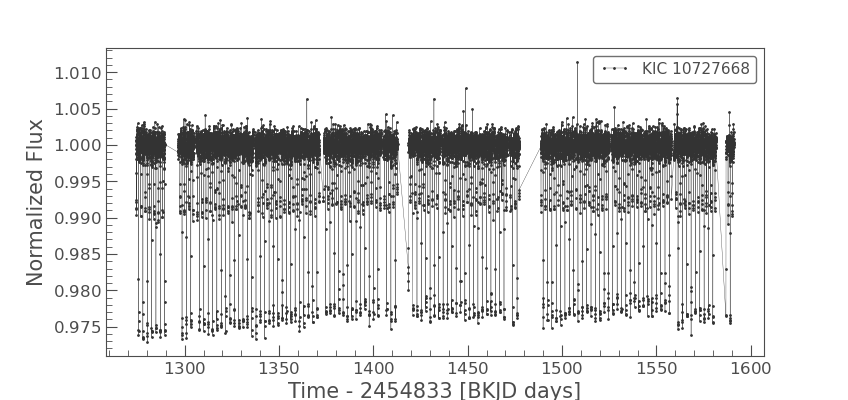

In [8]:
plt.close()
lc_collection_stitched_clean.plot(linewidth = .25, marker ='.', )
plt.show()

In [19]:
phoebe_times = binary.get_value('times@mylc@phoebe01@latest@model')
print(phoebe_times[:20])

[0.         0.0106455  0.02129101 0.03193651 0.04258202 0.05322752
 0.06387303 0.07451853 0.08516404 0.09580954 0.10645505 0.11710055
 0.12774606 0.13839156 0.14903707 0.15968257 0.17032808 0.18097358
 0.19161908 0.20226459]


In [20]:
phoebe_fluxes = binary.get_value('fluxes@mylc@phoebe01@latest@lc@model')

In [21]:
flux_median = statistics.median(phoebe_fluxes)
normalized_phoebe_fluxes = []
for flux in phoebe_fluxes:
    new_flux = flux/flux_median
    normalized_phoebe_fluxes.append(new_flux)

In [22]:
#plt.plot(phoebe_times, normalized_phoebe_fluxes)

In [23]:
lightkurve_times_array = lc_collection_stitched_clean.time.value
print(lightkurve_times_array)

[1274.15986284 1274.18029702 1274.20073109 ... 1590.96051885 1590.98095305
 1591.00138746]


In [24]:
phoebe_interpolation = CubicSpline(phoebe_times, normalized_phoebe_fluxes)

In [25]:
#Changing from BKJD days (Not really necessary)
x_values_days = []
x = 0
while x < len(lightkurve_times_array):
    x_values_days.append(lightkurve_times_array[x] - 1274)
    x += 1

In [26]:
y_interpolation = phoebe_interpolation(x_values_days)


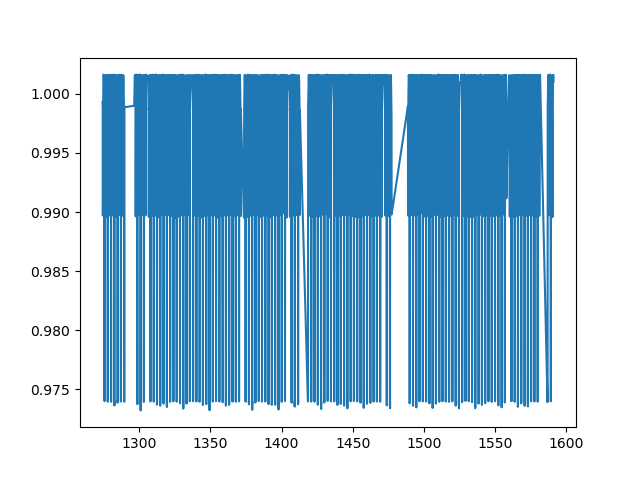

In [27]:
plt.close()
plt.plot(lightkurve_times_array, y_interpolation)
plt.show()

In [28]:
lightkurve_flux_array = lc_collection_stitched_clean.flux.value
print(lightkurve_flux_array)

[0.9994416  1.00068833 1.00060394 ... 1.         1.0002298  1.00078114]


In [29]:
#print(lc_collection_stitched_clean)

In [30]:
lc_observed=lk.LightCurve(time=x_values_days, flux=lightkurve_flux_array)

In [31]:
x_values_phoebe = []
x = 0
while x < len(lightkurve_times_array):
    x_values_phoebe.append(lightkurve_times_array[x] - 1274)
    x += 1

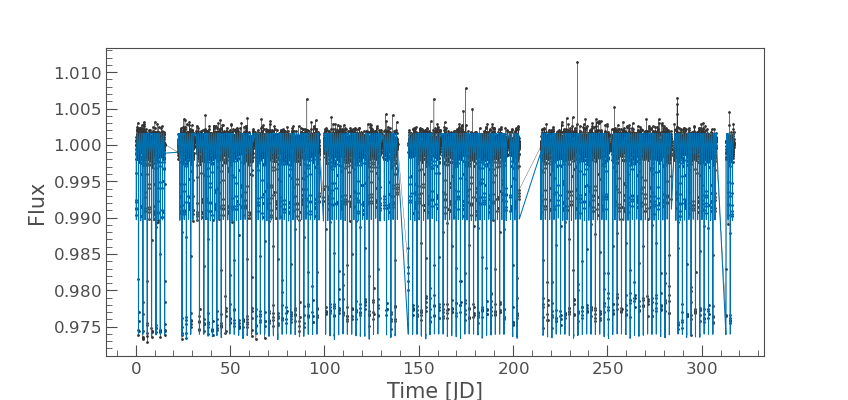

In [32]:

plt.close()
lc_observed.plot(linewidth=.25, marker='.')
plt.plot(x_values_phoebe, y_interpolation, linewidth=.75)




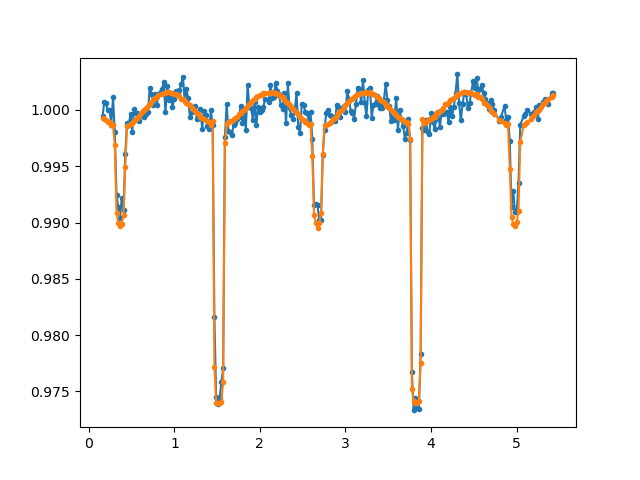

In [33]:
plt.close()
plt.plot(x_values_days[:250], lightkurve_flux_array[:250], marker = '.')
plt.plot(x_values_phoebe[:250], y_interpolation[:250], marker = '.')
plt.show()

In [34]:
print(y_interpolation)
print(lightkurve_flux_array)

[0.99930992 0.99920117 0.99907316 ... 1.00134049 1.00116002 1.00100685]
[0.9994416  1.00068833 1.00060394 ... 1.         1.0002298  1.00078114]


In [35]:
#lc_collection_stitched_clean.plot(linewidth = .25, marker ='.', )

    
#plt.plot(lightkurve_times_array, y_interpolation, linewidth=.5)


In [36]:
y_values = []
i = 0
while i < len(lightkurve_times_array):
    y_values.append(lightkurve_flux_array[i] - y_interpolation[i])
    i += 1
print(y_values)  

[MaskedNDArray(0.00013168), MaskedNDArray(0.00148716), MaskedNDArray(0.00153078), MaskedNDArray(0.00101326), MaskedNDArray(0.00113837), MaskedNDArray(5.43200937e-05), MaskedNDArray(0.00249297), MaskedNDArray(0.00112482), MaskedNDArray(0.00159974), MaskedNDArray(0.00136489), MaskedNDArray(0.00071113), MaskedNDArray(0.00231344), MaskedNDArray(0.00045006), MaskedNDArray(0.00115922), MaskedNDArray(0.00022148), MaskedNDArray(1.48104764e-05), MaskedNDArray(0.00092755), MaskedNDArray(-0.00077095), MaskedNDArray(0.00105344), MaskedNDArray(0.00053679), MaskedNDArray(0.00049654), MaskedNDArray(-0.00046198), MaskedNDArray(-0.0002685), MaskedNDArray(-0.00028409), MaskedNDArray(-0.00062356), MaskedNDArray(-0.00054521), MaskedNDArray(-0.00054589), MaskedNDArray(0.00145997), MaskedNDArray(0.00062567), MaskedNDArray(-0.00047453), MaskedNDArray(0.0004011), MaskedNDArray(-0.00069444), MaskedNDArray(0.00010244), MaskedNDArray(0.00043751), MaskedNDArray(0.00092206), MaskedNDArray(-0.00173436), MaskedNDArr

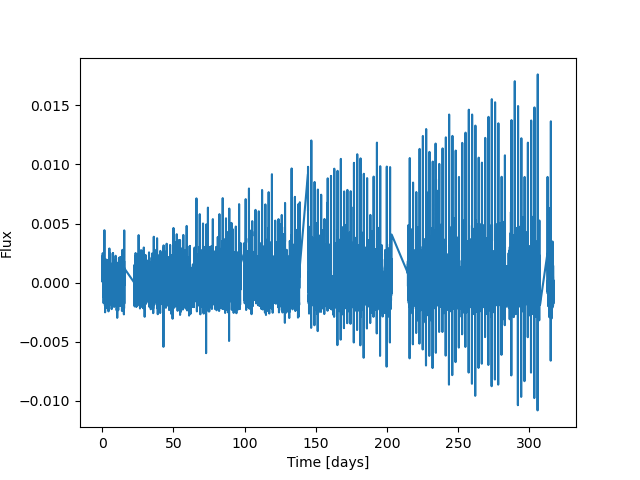

In [37]:
#Plot
plt.close()
plt.plot(x_values_phoebe, y_values)
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.show()


In [38]:
#Next: Lomb-Scargle_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
import astropy.units as u
t= x_values_phoebe * u.day
frequency, power = LombScargle(t, y_values).autopower()


In [39]:
plt.plot(frequency, power)
#plt.show()
plt.close()


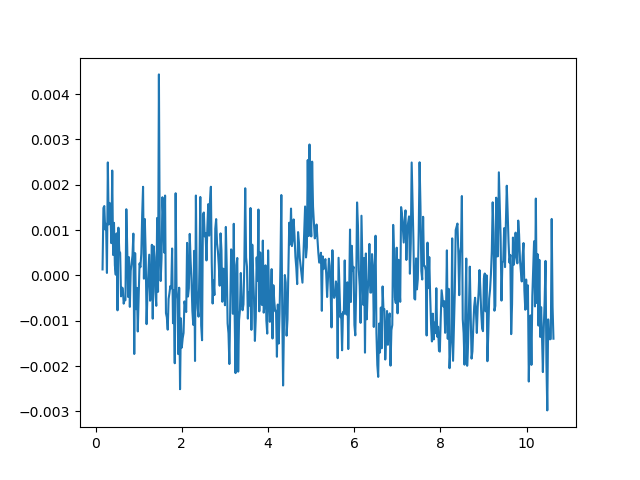

In [40]:
plt.close()
plt.plot(x_values_days[:500], y_values[:500])
plt.show()


In [41]:
#ls = LombScargle(x_values_phoebe, y_values)


In [42]:
#Changing from BKJD days (Not really necessary)
x_values_days = []
x = 0
while x < len(lightkurve_times_array):
    x_values_days.append(lightkurve_times_array[x] - 1274)
    x += 1


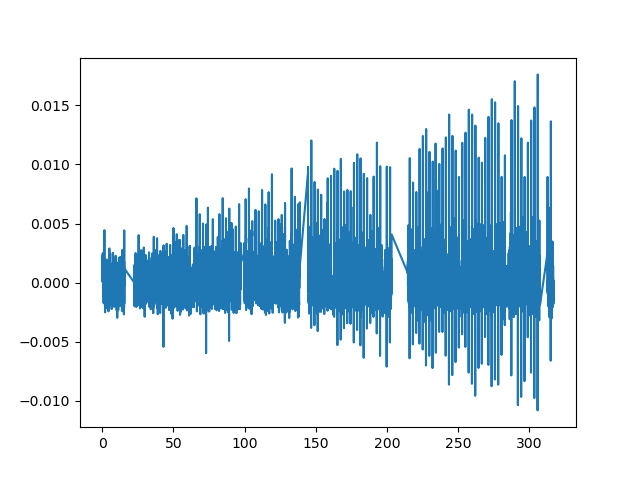

In [43]:
plt.close()
plt.plot(x_values_days, y_values)

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

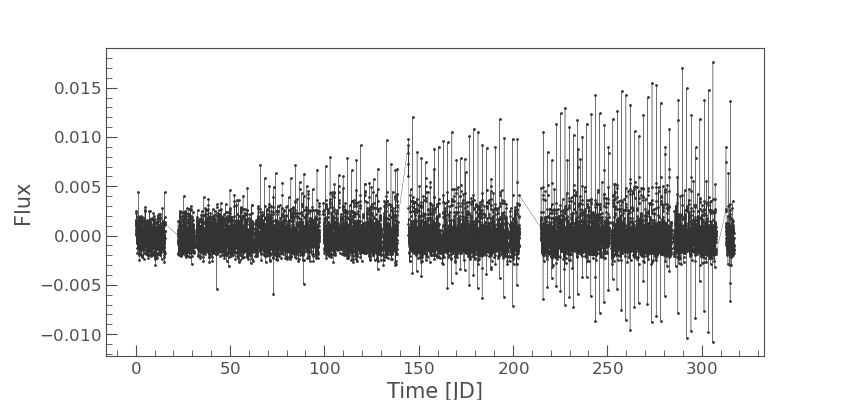

In [44]:
#Making lightcurve object
plt.close()
lc_subtracted = lk.LightCurve(time=x_values_days, flux=y_values)
lc_subtracted.plot(linewidth = .25, marker ='.', )


In [45]:
residual_flux = lc_subtracted.flux.value
print(residual_flux)

[ 0.00013168  0.00148716  0.00153078 ... -0.00134049 -0.00093022
 -0.00022571]


In [46]:
std_dev = np.std(residual_flux)
print(std_dev)
mean = np.mean(residual_flux)
print(mean)

0.0016004217096315671
3.3539445190185056e-05


In [47]:
j = 0
clean_y_values = []
clean_x_times = []
while j < len(x_values_days):
    if (y_values[j] < (mean + std_dev) and y_values[j] > (mean - std_dev)): 
        clean_y_values.append(y_values[j])
        clean_x_times.append(x_values_days[j])
    j +=1
   

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

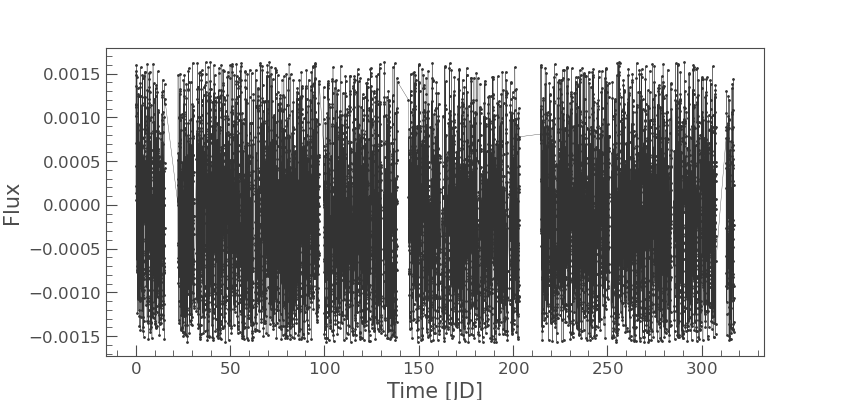

In [48]:
lc_test = lk.LightCurve(time=clean_x_times, flux=clean_y_values)
lc_test.plot(linewidth = .25, marker ='.', )

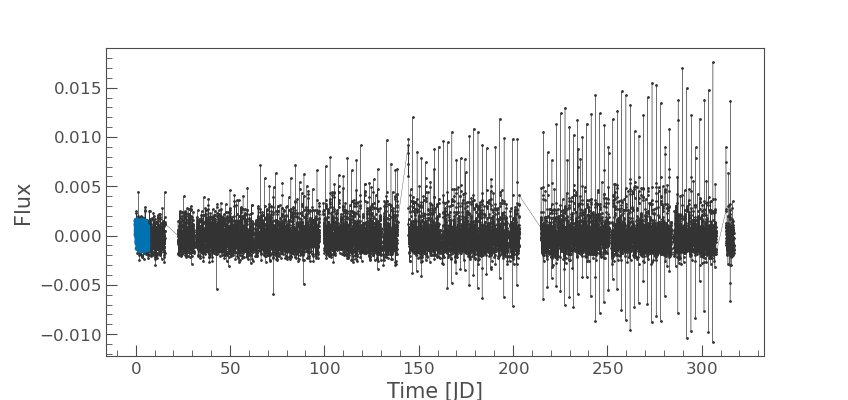

In [49]:
plt.close()
plt.plot(clean_x_times[:250], clean_y_values[:250], marker = '.')
plt.show()

In [50]:

pg = lc_test.to_periodogram()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

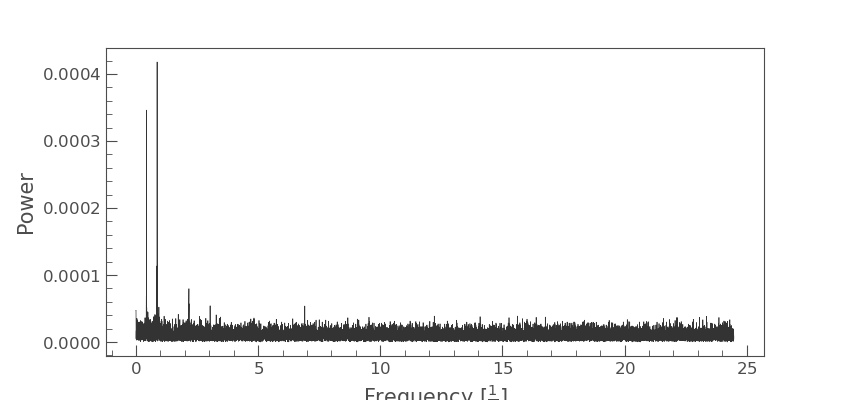

In [51]:

pg.plot()

In [52]:
#Pyriod 

In [53]:
lc_subtracted_fluxes = lc_subtracted.flux.value
lc_subtracted_times = lc_subtracted.time.value
print(lc_subtracted_times)
print(lc_subtracted_fluxes)

[1.59862843e-01 1.80297016e-01 2.00731090e-01 ... 3.16960519e+02
 3.16980953e+02 3.17001387e+02]
[ 0.00013168  0.00148716  0.00153078 ... -0.00134049 -0.00093022
 -0.00022571]


Thu, 14 Sep 2023 15:01 basic_logger INFO    Initiating Pyriod instance 0.<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Amplitude unit set to ppt (factor of 1000.0).<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Frequency unit set to 1/day.<br>
Thu, 14 Sep 2023 15:01 basic_logger WARNING No flux uncertainties provided. Data points will not be fit using weights.<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Rescale covar: False<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Periodogram properties: nterms 1 |
 default_view frequency |
 ls_method fast |
frequency_at_max_power 0.8673 1 / d |
 max_power 0.4179 |
 nyquist 24.4695 1 / d |
 period_at_max_power 1.153 d |
 frequency array (38761,) 1 / d |
 period array (38761,) d |
 power array (38761,) |
 label <class 'NoneType'> |
 meta <class 'collections.OrderedDict'> |
 targetid <class 'NoneType'> |
<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Pyriod object initialized.<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Periodogram 

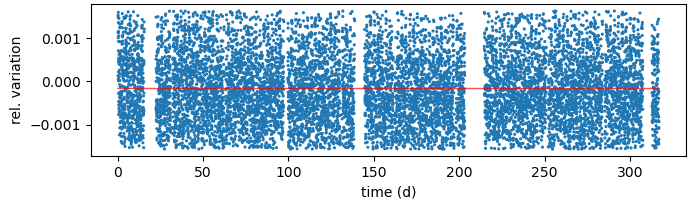

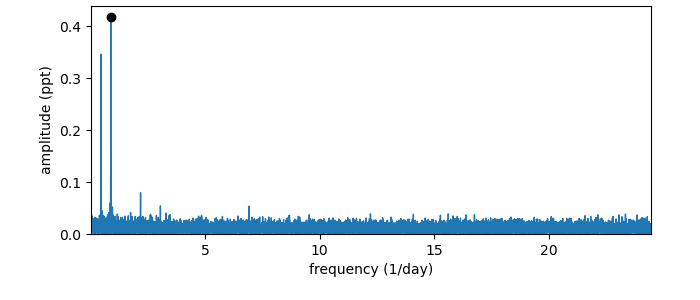

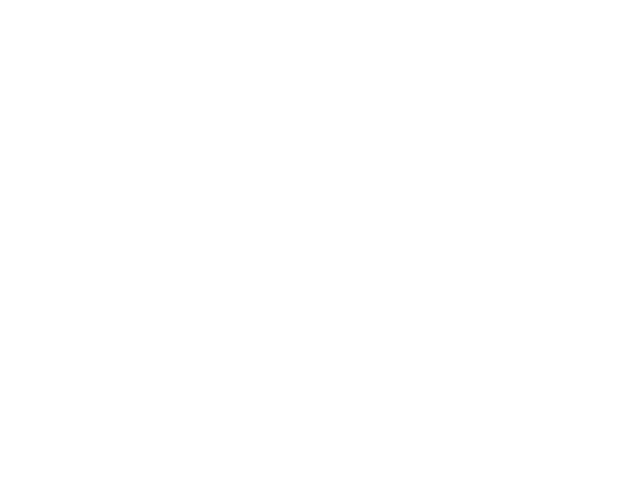

In [56]:
pyriod = Pyriod.Pyriod(lc_test,freq_unit="1/d")

In [57]:
#plt.close()
pyriod.Periodogram()
#plt.show()

Thu, 14 Sep 2023 15:01 basic_logger INFO    Signal ['f0'] added to model with frequency [0.8673105595452529] and amplitude [0.0004178656339445804].<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Fit refined.<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Fit properties:[[Model]]
    Model(sin, prefix='f0')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 11080
    # variables        = 3
    chi-square         = 9504.75470
    reduced chi-square = 0.85806217
    Akaike info crit   = -1693.11261
    Bayesian info crit = -1671.17392
[[Variables]]
    f0freq:   0.86731128 +/- 4.0352e-05 (0.00%) (init = 0.8673106)
    f0amp:    4.3558e-04 +/- 1.0976e-05 (2.52%) (init = 0.0004178656)
    f0phase:  0.13525794 +/- 0.00366149 (2.71%) (init = 0.1)<br>
Thu, 14 Sep 2023 15:01 basic_logger INFO    Periodogram properties: nterms 1 |
 default_view frequency |
 ls_method fast |
frequency_at_max_power 0.4337 1 / d |
 max_power 0.3288 |
 nyquist 

In [ ]:
pyriod.Pyriod()


In [ ]:
plt.close()
lc_observed.plot(linewidth=.25, marker ='.')
plt.scatter(times_array_of_depths, depths_array, s = 3, c = 'red')
plt.scatter(times_array_of_depths_secondary, depths_array_secondary, s = 3, c = 'green')
plt.show()
#plt.plot(x_values_phoebe, y_interpolation2, linewidth=.75)

In [ ]:
#Flux as a function of time:

In [ ]:
lc_collection_stitched_clean.flux.value

In [ ]:
print(x_values_days[-1])
print(x_values_days[0])

In [ ]:
len(lightkurve_flux_array)

In [ ]:
12160/123.1

In [58]:

depths_array = []
i = 0
while i < 13441:
    current = lightkurve_flux_array[i]
    lowest = 1
    while current < 0.98:
        if(lightkurve_flux_array[i] < lowest):
            lowest = lightkurve_flux_array[i]
            
        i = i +1
        current = lightkurve_flux_array[i]
    if lowest != 1:
        depths_array.append(lowest)
    i = i +1
   
                
        
print(depths_array)

[MaskedNDArray(0.97388306), MaskedNDArray(0.97330807), MaskedNDArray(0.97289365), MaskedNDArray(0.97352867), MaskedNDArray(0.97422201), MaskedNDArray(0.9735605), MaskedNDArray(0.97391304), MaskedNDArray(0.97337173), MaskedNDArray(0.97346178), MaskedNDArray(0.97493425), MaskedNDArray(0.97458771), MaskedNDArray(0.97436139), MaskedNDArray(0.97403255), MaskedNDArray(0.97385068), MaskedNDArray(0.97458363), MaskedNDArray(0.97493618), MaskedNDArray(0.97413086), MaskedNDArray(0.9754725), MaskedNDArray(0.97505775), MaskedNDArray(0.97477863), MaskedNDArray(0.97489206), MaskedNDArray(0.97495191), MaskedNDArray(0.9737554), MaskedNDArray(0.97332049), MaskedNDArray(0.97563589), MaskedNDArray(0.97338975), MaskedNDArray(0.97549853), MaskedNDArray(0.97503932), MaskedNDArray(0.97520077), MaskedNDArray(0.97594723), MaskedNDArray(0.97549297), MaskedNDArray(0.97562173), MaskedNDArray(0.97583244), MaskedNDArray(0.974442), MaskedNDArray(0.97492562), MaskedNDArray(0.97633854), MaskedNDArray(0.97559009), Maske

In [ ]:
print(len(depths_array))

In [61]:
k=0
depth_times_array = []
while k < len(depths_array):
    g = 0
    while(lightkurve_flux_array[g].unmasked) != (depths_array[k].unmasked):
        g += 1
    depth_times_array.append(g)
    k += 1
print(depth_times_array)

[65, 176, 284, 393, 503, 618, 726, 838, 951, 1064, 1230, 1344, 1456, 1568, 1679, 1793, 1902, 2014, 2127, 2237, 2351, 2460, 2574, 2641, 2755, 2865, 2979, 3088, 3202, 3311, 3425, 3537, 3648, 3757, 3870, 3983, 4094, 4207, 4324, 4436, 4548, 4662, 4773, 4886, 4993, 5104, 5215, 5329, 5438, 5548, 5662, 5836, 5950, 6059, 6233, 6342, 6456, 6566, 6681, 6793, 6902, 6974, 7087, 7199, 7308, 7419, 7531, 7644, 7753, 7869, 7979, 8092, 8205, 8318, 8426, 8539, 8716, 8830, 8946, 9061, 9172, 9284, 9387, 9500, 9611, 9722, 9833, 9942, 10055, 10167, 10277, 10389, 10501, 10611, 10664, 10778, 10889, 11002, 11112, 11225, 11333, 11448, 11560, 11671, 11778, 11889, 12002, 12112, 12115, 12270, 12381, 12495, 12607, 12719, 12829, 12941, 13052, 13164, 13249, 13358]


In [62]:
times_array_of_depths= []
for i in depth_times_array:
    times_array_of_depths.append(x_values_days[i])


print(times_array_of_depths)
    

[1.508518299626303, 3.797144328826107, 6.147070842220273, 8.435692902035953, 10.724312672195083, 13.094666665980185, 15.321979999542236, 24.558153935526207, 26.86719106237433, 29.196659445777186, 33.77385240227159, 36.12374619155162, 38.43276959058858, 40.74178989529901, 43.03037360360031, 45.359821879290394, 47.60753215762816, 49.95740810847201, 52.28684725253697, 54.53454865490494, 56.884415270636964, 59.13211080578185, 61.48197116558731, 63.750094130613434, 66.09994819560961, 68.3680651912, 70.71791298280732, 72.98602374599432, 75.3358653198593, 77.60397022024699, 79.93337233400234, 82.26277132910036, 84.57173405456706, 86.81939411645726, 89.12835117528448, 91.45773863945215, 93.74625693805865, 96.075638810682, 100.67308716662956, 102.96159538879147, 105.27053410545341, 107.62033677320142, 109.90883780345757, 112.21776990796934, 114.48583383610094, 116.77432871869678, 119.08325480022904, 121.45347752573434, 123.74196715019934, 126.01002230748418, 128.3598075738264, 132.9367769429372

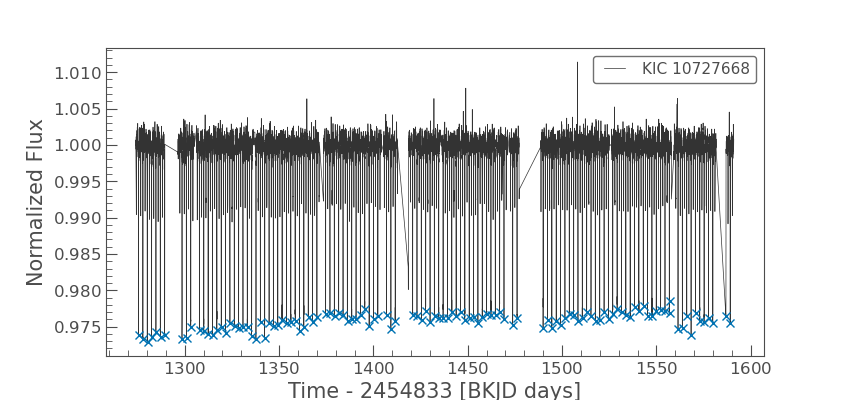

In [74]:
lc_collection_stitched_clean.plot()
#print(lc_collection_stitched_clean.time[0])
plt.plot(np.array(times_array_of_depths)+1274.15986, depths_array,'x')
plt.show()

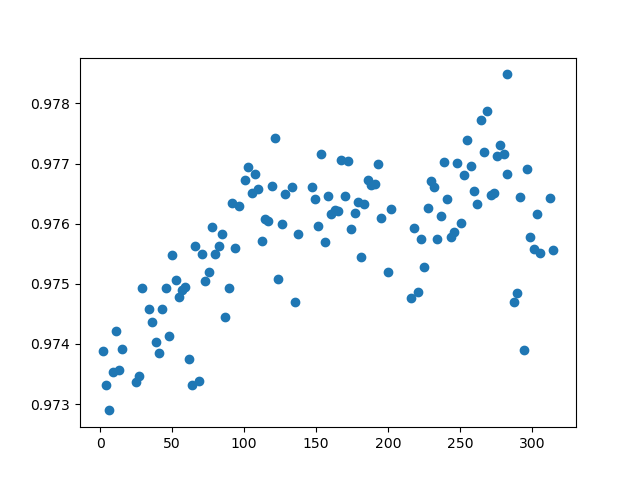

In [78]:
plt.figure()
plt.scatter(times_array_of_depths, depths_array)
#plt.show()


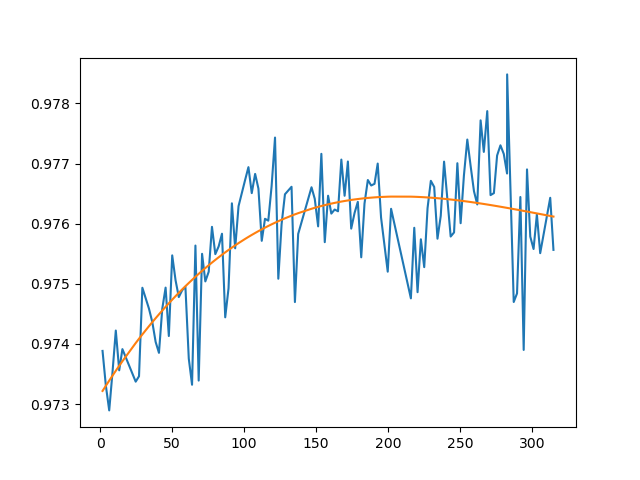

In [81]:
#calculate equation fro trendline
z = np.polyfit(times_array_of_depths, depths_array, 3) #Changing to 3 is quadratic
p = np.poly1d(z)

#add trendline to plot
plt.figure()
plt.plot(times_array_of_depths, depths_array)
plt.plot(times_array_of_depths, p(times_array_of_depths))

In [ ]:
print(lightkurve_flux_array[65])

In [82]:
#secondary eclipse

depths_array_secondary = []
for i in range(1, 13441):
    current = lightkurve_flux_array[i]
    if  current < 0.995 and current > 0.987 and (lightkurve_flux_array[i-1])> current and (lightkurve_flux_array[i-2]) > current and (lightkurve_flux_array[i+2]) > current and (lightkurve_flux_array[i+1])> current and(lightkurve_flux_array[i+3]) > current and (lightkurve_flux_array[i-3]) > current and (lightkurve_flux_array[i+4]) > current and (lightkurve_flux_array[i-4]) > current:
        depths_array_secondary.append(current)
print(depths_array_secondary) 

[MaskedNDArray(0.99041763), MaskedNDArray(0.99023776), MaskedNDArray(0.99089176), MaskedNDArray(0.98974943), MaskedNDArray(0.98986283), MaskedNDArray(0.98944059), MaskedNDArray(0.99003756), MaskedNDArray(0.99060305), MaskedNDArray(0.99051025), MaskedNDArray(0.99117126), MaskedNDArray(0.98954809), MaskedNDArray(0.98969283), MaskedNDArray(0.99005008), MaskedNDArray(0.98995189), MaskedNDArray(0.99088653), MaskedNDArray(0.99123615), MaskedNDArray(0.98984938), MaskedNDArray(0.99038417), MaskedNDArray(0.99069565), MaskedNDArray(0.98939616), MaskedNDArray(0.99114005), MaskedNDArray(0.99148463), MaskedNDArray(0.99132659), MaskedNDArray(0.98989112), MaskedNDArray(0.99095562), MaskedNDArray(0.99009394), MaskedNDArray(0.99135996), MaskedNDArray(0.99005922), MaskedNDArray(0.98993238), MaskedNDArray(0.99009978), MaskedNDArray(0.99079944), MaskedNDArray(0.99060465), MaskedNDArray(0.99086701), MaskedNDArray(0.99022779), MaskedNDArray(0.99190529), MaskedNDArray(0.99061277), MaskedNDArray(0.99044623), 

In [83]:
k=0
depth_times_array_secondary = []
while k < len(depths_array_secondary):
    g = 0
    while(lightkurve_flux_array[g].unmasked) != (depths_array_secondary[k].unmasked):
        g += 1
    depth_times_array_secondary.append(g)
    k += 1
print(depth_times_array_secondary)

[10, 122, 231, 339, 449, 560, 671, 784, 897, 1007, 1119, 1175, 1286, 1398, 1512, 1624, 1737, 1847, 1958, 2069, 2180, 2294, 2405, 2517, 2699, 2811, 2920, 3034, 3145, 3257, 3368, 3480, 3590, 3701, 3814, 3925, 4038, 4149, 4261, 4270, 4380, 4494, 4603, 4717, 4830, 4938, 5051, 5161, 5271, 5383, 5493, 5604, 5718, 5781, 5894, 6004, 6175, 6288, 6401, 6513, 6622, 6735, 6848, 7029, 7143, 7253, 7364, 7476, 7590, 7700, 7811, 7925, 8036, 8147, 8260, 8372, 8482, 8596, 8661, 8772, 8882, 8893, 9003, 9116, 9229, 9340, 9443, 9555, 9665, 9778, 9889, 10000, 10113, 10223, 10335, 10443, 10556, 10722, 10835, 10947, 11056, 11168, 11278, 11392, 11502, 11614, 11725, 11834, 11948, 12058, 12167, 12219, 12328, 12438, 12551, 12663, 12776, 12886, 12999, 13111, 13220, 13303, 13414]


In [84]:
times_array_of_depths_secondary= []
for i in depth_times_array_secondary:
    times_array_of_depths_secondary.append(x_values_days[i])


print(times_array_of_depths_secondary)

[0.36420447377167875, 2.6936998488527024, 5.0027589528181124, 7.291382028706721, 9.600437054643407, 11.90949001431727, 14.198106571064272, 23.434285404757247, 25.763757758621068, 28.031925646100717, 30.34095865010022, 32.64998901461513, 34.93858273579826, 37.24760760515346, 39.57706320488069, 41.88608216139255, 44.215531922767696, 46.483677274569345, 48.751819925775635, 51.08126067287958, 53.3698310255495, 55.71969922057178, 58.00826335398597, 60.29682455408329, 64.93523836771055, 67.24422375621361, 69.51233925237466, 71.86218549682235, 74.15072817570763, 76.48013482011447, 78.76867160547408, 81.09807220512448, 83.3866030133795, 85.65469778609986, 87.98408962153917, 90.27261194055609, 92.60199802286661, 94.87008191948553, 97.19946259175049, 99.54926536542916, 101.8173415800411, 104.16714785316435, 106.41478624539013, 108.74415461964963, 111.0735207333637, 113.36201857011474, 115.69138047494198, 117.95944149456045, 120.24793328854139, 122.59772258831799, 124.88621132476692, 127.15426575

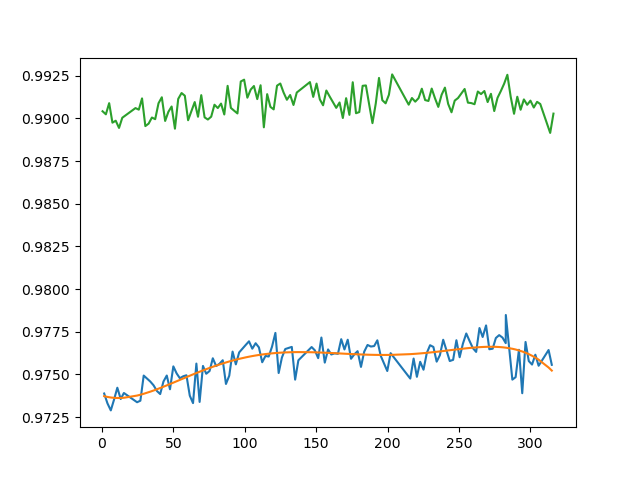

In [85]:
plt.close()
plt.plot(times_array_of_depths_secondary, depths_array_secondary)
plt.show()

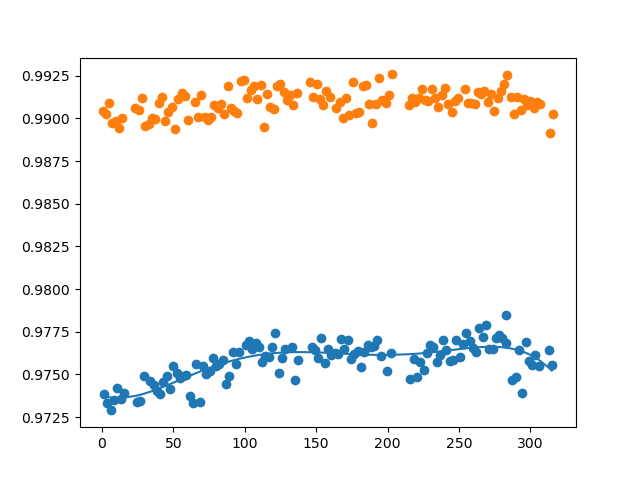

In [86]:
plt.close()
plt.scatter(times_array_of_depths_secondary, depths_array_secondary)
plt.show()

In [87]:
#calculate equation for trendline
z = np.polyfit(times_array_of_depths_secondary, depths_array_secondary, 3)
p = np.poly1d(z)

#add trendline to plot
plt.plot(times_array_of_depths_secondary, p(times_array_of_depths_secondary))

In [88]:
len(depths_array)

120

In [89]:
len(depths_array_secondary)

123

In [90]:
#Phased Light Curve
lc_folded = lc_observed.fold(period=2.306)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

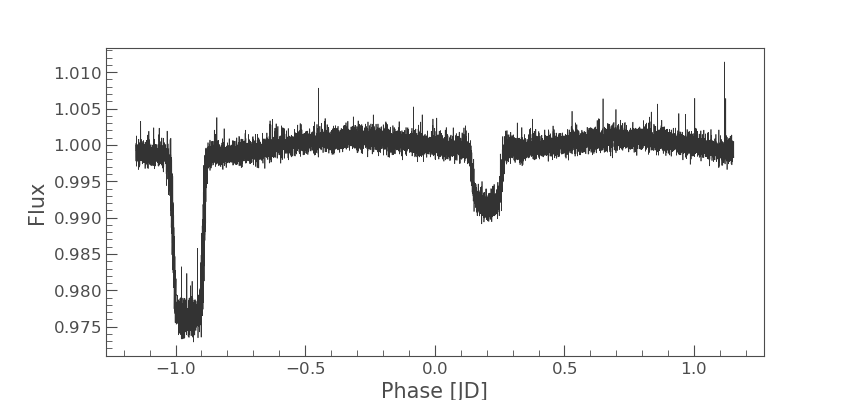

In [91]:
plt.close()
lc_folded.plot()

In [ ]:
plt.close()
plt.scatter(x=x_values_days, y=lightkurve_flux_array, s =1)
plt.show()

In [ ]:
times_array_of_depths_secondary

In [93]:
period_length = []
for i in range (1, len(times_array_of_depths)):
    length = times_array_of_depths[i] - times_array_of_depths[i-1]
    if length > 1 and length < 3:
        period_length.append(length)
    
    

In [94]:
print(period_length)
print(len(period_length))

[2.288626029199804, 2.3499265133941662, 2.2886220598156797, 2.28861977015913, 2.370353993785102, 2.2273133335620514, 2.309037126848125, 2.3294683834028547, 2.3498937892800313, 2.3090233990369597, 2.3090203047104296, 2.288583708301303, 2.3294482756900834, 2.247710278337763, 2.3498759508438525, 2.3294391440649633, 2.247701402367966, 2.349866615732026, 2.247695535144885, 2.3498603598054615, 2.268122965026123, 2.3498540649961797, 2.2681169955903897, 2.349847791607317, 2.2681107631869963, 2.3498415738649783, 2.268104900387698, 2.32940211375535, 2.3293989950980176, 2.3089627254666993, 2.247660061890201, 2.308957058827218, 2.3293874641676666, 2.2885182986065047, 2.329381872623344, 2.2885082221619086, 2.3089387166619417, 2.3498026677480084, 2.288501030256157, 2.3089321045117686, 2.268063928131596, 2.2884948825958418, 2.308926081532263, 2.3702227255053003, 2.288489624465001, 2.2680551572848344, 2.3497852663422236, 2.3497817238094285, 2.2680491351275123, 2.247613399886177, 2.3497773375202087, 2.

In [97]:
period_number = np.arange(len(period_length))


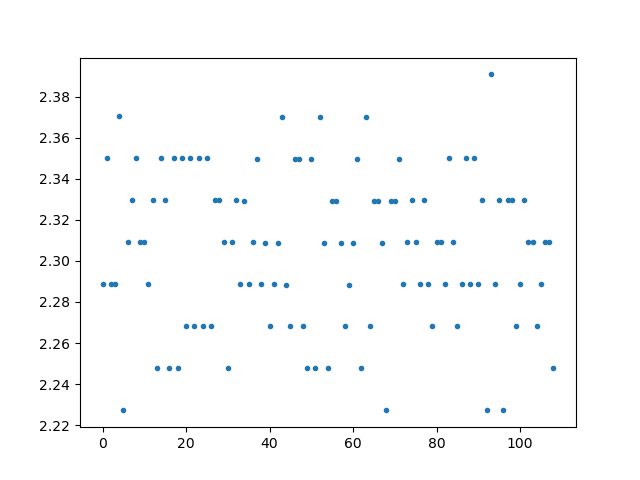

In [100]:
plt.figure()
plt.plot(period_number, period_length,'.')
plt.show()
#gaps between are causing issues, also some lows are recorded but they are not minimums

In [ ]:
plt.close()
plt.scatter(x=period_number, y=period_length, s =5)
plt.show()

In [ ]:
#Test of lightkurve periodogram for the period lengths
#plt.close()
#lc_period_lengths = lk.LightCurve(time = period_number, flux= period_deviation)
#pg = lc_period_lengths.to_periodogram()
#pg.plot()
#plt.show()

In [101]:
period_deviation = []
for i in period_length:
    period_deviation.append(i - 2.3058)
    
print(period_deviation)

[-0.017173970800195892, 0.04412651339416618, -0.017177940184320395, -0.017180229840870087, 0.06455399378510185, -0.07848666643794866, 0.003237126848124827, 0.023668383402854598, 0.04409378928003127, 0.0032233990369596732, 0.0032203047104295557, -0.017216291698697095, 0.02364827569008332, -0.058089721662236915, 0.04407595084385241, 0.023639144064963258, -0.05809859763203429, 0.04406661573202575, -0.058104464855115, 0.04406035980546141, -0.03767703497387709, 0.04405406499617959, -0.037683004409610366, 0.04404779160731698, -0.037689236813003735, 0.0440415738649782, -0.03769509961230222, 0.02360211375534993, 0.02359899509801755, 0.0031627254666992677, -0.058139938109798894, 0.003157058827218062, 0.02358746416766655, -0.017281701393495386, 0.02358187262334388, -0.017291777838091438, 0.003138716661941654, 0.04400266774800832, -0.017298969743843262, 0.0031321045117684854, -0.037736071868403886, -0.0173051174041583, 0.0031260815322631252, 0.06442272550530026, -0.017310375534999256, -0.03774484

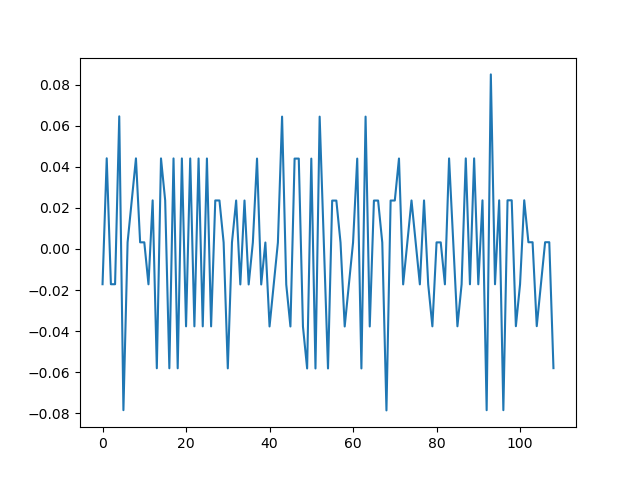

In [103]:
plt.figure()
plt.plot(period_number, period_deviation)
plt.show()

In [ ]:
plt.close()
plt.scatter(x =period_number, y = period_deviation)
plt.show()

In [ ]:
plt.close()
frequency, power = LombScargle(period_number, period_deviation).autopower()
plt.plot(frequency,power)
plt.show()

In [ ]:
period_length_secondary = []
for i in range (1, len(times_array_of_depths_secondary)):
    length = times_array_of_depths_secondary[i] - times_array_of_depths_secondary[i-1]
    if length > 1 and length < 3:
        period_length_secondary.append(length)

In [ ]:
print(period_length_secondary)

In [ ]:
print(period_length)

In [ ]:
period_number_secondary = np.arange(115)

In [ ]:
plt.close()
plt.plot(period_number_secondary, period_length_secondary)
plt.show()

In [ ]:
period_deviation_secondary = []
for i in period_length_secondary:
    period_deviation_secondary.append(i - 2.3058)
    
print(period_deviation_secondary)

In [ ]:
plt.close()
plt.plot(period_number_secondary, period_deviation_secondary)
plt.show()

In [ ]:
plt.close()
frequency, power = LombScargle(period_number_secondary, period_deviation_secondary).autopower()
plt.plot(frequency,power)
plt.show()

In [ ]:
lc0 = search[0].download()

In [ ]:
plt.close()
lc0.plot()
plt.show()

In [ ]:
lc1 = search[1].download()
plt.close()
lc1.plot()
plt.show()

In [ ]:
lc2 = search[2].download()
plt.close()
lc2.plot()
plt.show()

In [ ]:
#lc3 = search[3].download()
#plt.close()
#lc3.plot(marker='.')
#plt.show()

In [104]:
#Method B
method_b_points = []
method_b_times = []
start = [0, 16, 31, 62, 130.5, 139, 162, 203.5, 251]
finish = [16, 31, 62, 130.5, 139, 162, 203.5, 251, 286]
position =0
i = 0
while i < 9:
    lowest = 1
    while position < len(x_values_days) and x_values_days[position] >= start[i] and finish[i] >= x_values_days[position]:
        if lightkurve_flux_array[position] < lowest:
            lowest = lightkurve_flux_array[position]
            lowest_time = x_values_days[position]
        position += 1
    method_b_points.append(lowest)
    method_b_times.append(lowest_time)
    i += 1

In [ ]:
#First round of minema now need secondary minima
print(method_b_points)

In [105]:


position =0
i = 0
while i < 9:
    lowest = 1
    while position < len(x_values_days) and x_values_days[position] >= start[i] and finish[i] >= x_values_days[position]:
        if lightkurve_flux_array[position] < lowest and lightkurve_flux_array[position] != method_b_points[i]:
            lowest = lightkurve_flux_array[position]
            lowest_time = x_values_days[position]
        position += 1
    method_b_points.append(lowest)
    method_b_times.append(lowest_time)
    i += 1

In [106]:
#Check that it has actually worked and the correct secondary minima have been added
print(method_b_points)

[MaskedNDArray(0.97289365), MaskedNDArray(0.97337173), MaskedNDArray(0.9737554), MaskedNDArray(0.97332049), MaskedNDArray(0.97469592), MaskedNDArray(0.97569213), MaskedNDArray(0.97520117), MaskedNDArray(0.9747575), MaskedNDArray(0.97631967), MaskedNDArray(0.97330807), MaskedNDArray(0.97346178), MaskedNDArray(0.97385068), MaskedNDArray(0.97338975), MaskedNDArray(0.97577489), MaskedNDArray(0.97572054), MaskedNDArray(0.97536659), MaskedNDArray(0.97486003), MaskedNDArray(0.97647491)]


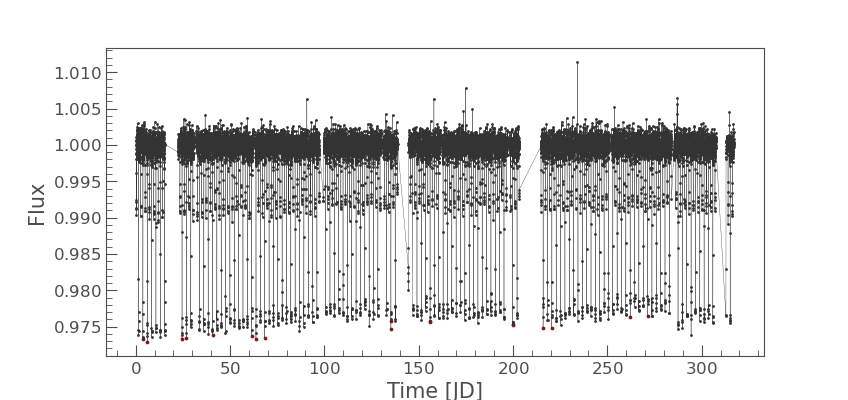

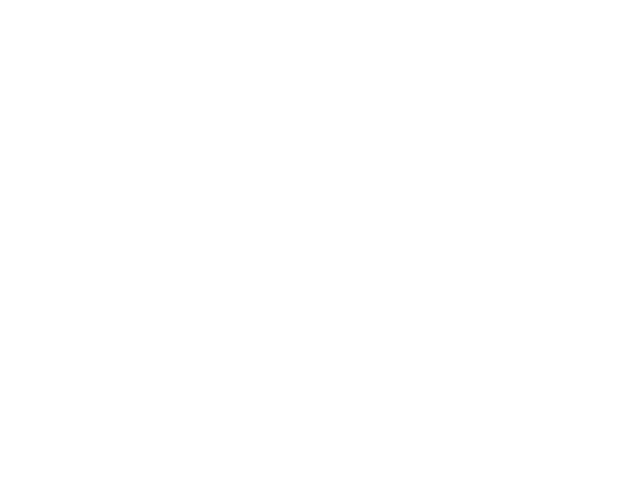

In [108]:
plt.figure()
lc_observed.plot(linewidth=.25, marker ='.')
plt.scatter(x=method_b_times, y = method_b_points, s=3, c ='red')

plt.show()

In [ ]:
#plt.close()
#plt.scatter(x=method_b_times, y = method_b_points)
#plt.show()

In [ ]:
#calculate equation for trendline
z = np.polyfit(method_b_times, method_b_points, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(method_b_times, p(method_b_times))

In [ ]:
print(p(method_b_times))

In [ ]:
print(method_b_times)

In [109]:
from lmfit import Parameters, minimize, fit_report

In [110]:
def f(D, params):
    a0 = params['a0'].value
    a1 = params['a1'].value

    R = a1 * D + a0

    return R


def E(params, D, R):
    model_values = f(D, params)
    error = R - model_values
    return error


In [111]:
float_method_b_times = []
for i in method_b_times:
    float_method_b_times.append(float(i))

float_method_b_points = []
for i in method_b_points:
    float_method_b_points.append(float(i))

In [112]:
df = pd.DataFrame(float_method_b_times, columns = ['Times'])
df['Points'] = float_method_b_points
print(df)

         Times    Points
0     6.147071  0.972894
1    24.558154  0.973372
2    61.481971  0.973755
3    63.750094  0.973320
4   135.286559  0.974696
5   156.046326  0.975692
6   199.834110  0.975201
7   215.935460  0.974757
8   262.094925  0.976320
9     3.797144  0.973308
10   26.867191  0.973462
11   40.741790  0.973851
12   68.368065  0.973390
13  135.245693  0.975775
14  156.025893  0.975721
15  199.813677  0.975367
16  220.573823  0.974860
17  271.331062  0.976475


In [113]:

D = df['Times']
R = df['Points']
params = Parameters()
params.add('a0', value=5, vary=True ) #vary = False???
params.add('a1', value=1)

result = minimize(E, params, args=(D,R))
R_fit =f(df['Times'], result.params)

r2 = 1 - sum((R-R_fit)**2)/sum((R-np.mean(R))**2)

In [114]:
print(r2)

0.7971121699344144


In [115]:
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 4.6856e-06
    reduced chi-square = 2.9285e-07
    Akaike info crit   = -268.904976
    Bayesian info crit = -267.124232
[[Variables]]
    a0:  0.97312288 +/- 2.2241e-04 (0.02%) (init = 5)
    a1:  1.1568e-05 +/- 1.4590e-06 (12.61%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.819


In [ ]:
#Start of method A
#Do lightcurves in order so variable i is in right place
set_1_flux = []
set_1_time = []
i = 0 
while x_values_days[i] < 16:
    set_1_flux.append(lightkurve_flux_array[i])
    set_1_time.append(x_values_days[i])
    i += 1


In [ ]:

set_1_lc = lk.LightCurve(time=set_1_time, flux=set_1_flux)
set_1_lc_folded = set_1_lc.fold(period=2.3058)
plt.close()
set_1_lc_folded.plot()
plt.show()

In [ ]:
set_2_flux = []
set_2_time = []
 
while x_values_days[i] < 31:
    set_2_flux.append(lightkurve_flux_array[i])
    set_2_time.append(x_values_days[i])
    i += 1


set_2_lc = lk.LightCurve(time=set_2_time, flux=set_2_flux)
set_2_lc_folded = set_2_lc.fold(period=2.3058)
plt.close()
set_2_lc_folded.plot()
plt.show()

In [ ]:
set_3_flux = []
set_3_time = []

while x_values_days[i] < 62:
    set_3_flux.append(lightkurve_flux_array[i])
    set_3_time.append(x_values_days[i])
    i += 1


set_3_lc = lk.LightCurve(time=set_3_time, flux=set_3_flux)
set_3_lc_folded = set_3_lc.fold(period=2.3058)
plt.close()
set_3_lc_folded.plot()
plt.show()

In [ ]:
set_4_flux = []
set_4_time = []

while x_values_days[i] < 130.5:
    set_4_flux.append(lightkurve_flux_array[i])
    set_4_time.append(x_values_days[i])
    i += 1


set_4_lc = lk.LightCurve(time=set_4_time, flux=set_4_flux)
set_4_lc_folded = set_4_lc.fold(period=2.3058)
plt.close()
set_4_lc_folded.plot()
plt.show()

In [ ]:
set_5_flux = []
set_5_time = []

while x_values_days[i] < 139:
    set_5_flux.append(lightkurve_flux_array[i])
    set_5_time.append(x_values_days[i])
    i += 1


set_5_lc = lk.LightCurve(time=set_5_time, flux=set_5_flux)
set_5_lc_folded = set_5_lc.fold(period=2.3058)
plt.close()
set_5_lc_folded.plot()
plt.show()

In [ ]:
set_6_flux = []
set_6_time = []

while x_values_days[i] < 162:
    set_6_flux.append(lightkurve_flux_array[i])
    set_6_time.append(x_values_days[i])
    i += 1


set_6_lc = lk.LightCurve(time=set_6_time, flux=set_6_flux)
set_6_lc_folded = set_6_lc.fold(period=2.3058)
plt.close()
set_6_lc_folded.plot()
plt.show()

In [ ]:
set_7_flux = []
set_7_time = []

while x_values_days[i] < 203.5:
    set_7_flux.append(lightkurve_flux_array[i])
    set_7_time.append(x_values_days[i])
    i += 1

print("The value of i is", i)
set_7_lc = lk.LightCurve(time=set_7_time, flux=set_7_flux)
set_7_lc_folded = set_7_lc.fold(period=2.3058)
plt.close()
set_7_lc_folded.plot()
plt.show()

In [ ]:
set_8_flux = []
set_8_time = []

while x_values_days[i] < 251:
    set_8_flux.append(lightkurve_flux_array[i])
    set_8_time.append(x_values_days[i])
    i += 1

print('The value of i is', i)
set_8_lc = lk.LightCurve(time=set_8_time, flux=set_8_flux)
set_8_lc_folded = set_8_lc.fold(period=2.3058)
plt.close()
set_8_lc_folded.plot()
plt.show()

In [ ]:
set_9_flux = []
set_9_time = []

while i < len(x_values_days):
    set_9_flux.append(lightkurve_flux_array[i])
    set_9_time.append(x_values_days[i])
    i += 1


set_9_lc = lk.LightCurve(time=set_9_time, flux=set_9_flux)
set_9_lc_folded = set_9_lc.fold(period=2.3058)
plt.close()
set_9_lc_folded.plot()
plt.show()

In [ ]:
#Equation from article
#I(Φ)=I0+A{1−[(Φ − Φ0)/d]2}^C

In [ ]:
flux_9 = set_9_lc_folded.flux.value

In [ ]:
time_9 = set_9_lc_folded.time.value

In [ ]:
from scipy.optimize import curve_fit

In [ ]:

y = flux_9[2180:2370]
x = time_9[2180:2370]

In [ ]:
plt.close()
plt.scatter(x=x, y=y)
plt.show()

In [ ]:
np.min(p(x))

In [ ]:
set_9_lc_folded.flux.value